IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Baris Kaftancioglu
Chadi Tawbi


Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

import warnings
# Filter specific warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

C:\Users\chadi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [4]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [5]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [6]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [7]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [8]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Apprentissage Supervisé

## Prédire le Groupe d'Aliments des Ingredients

Nous allons utiliser l'algorithme d'apprentissage **KNN** afin de prédire pour chaque ingrédient du jeu de données **data_ingredients** le target **groupe d'aliment**.

In [9]:
data_ingredients.head()

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500,90.100,0.310,8.090,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310,9.060,0.144,15.300,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900,99.200,0.455,23.400,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580,54.300,1.950,1.720,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231,0.998,0.165,0.138,1.520000e-07


#### Target:

In [10]:
target = data_ingredients['Groupe d\'aliment'].unique()
print(target)
print('Nombre de classes :', target.size)

['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']
Nombre de classes : 11


#### Interressons nous que aux attributs numeriques de notre jeu de données.

In [11]:
data_ingredients_num=data_ingredients.copy()
columns_to_delete = ['Ciqual AGB', 'Ciqual code', 'Groupe d\'aliment', 'Sous-groupe d\'aliment','Sous-groupe','Nom Français', 'LCI Name','Code et Nom','Ingredients','Groupe']
for column in columns_to_delete:
    del data_ingredients_num[column]
data_ingredients_num.head()

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,0.17,1.58000,4.580000e-08,0.21400,0.002670,1.160000e-07,4.070000e-08,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500,90.100,0.310,8.090,1.480000e-05
1,0.06,0.39900,5.950000e-08,0.51600,0.001090,2.810000e-08,7.160000e-09,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310,9.060,0.144,15.300,2.320000e-06
2,0.22,1.98000,1.050000e-07,0.73000,0.003770,1.440000e-07,4.780000e-08,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900,99.200,0.455,23.400,1.710000e-05
3,0.05,0.06210,1.760000e-08,0.01140,0.000890,2.640000e-08,2.050000e-08,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580,54.300,1.950,1.720,1.890000e-06
4,0.00,0.00985,1.410000e-09,0.00239,0.000045,8.710000e-10,3.390000e-10,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231,0.998,0.165,0.138,1.520000e-07


#### Nous devons ensuite normaliser les données

In [12]:
data_ingredients_num_normal=clust.normalisation(data_ingredients_num)
data_ingredients_num_normal = np.array(data_ingredients_num_normal)
data_ingredients_num_normal

array([[0.01524262, 0.0143953 , 0.01383906, ..., 0.19157954, 0.01137834,
        0.07664894],
       [0.00538625, 0.00363527, 0.01797869, ..., 0.18803108, 0.02151899,
        0.01201524],
       [0.01972279, 0.01803967, 0.03172709, ..., 0.1946791 , 0.03291139,
        0.0885606 ],
       ...,
       [0.00267477, 0.00192017, 0.00407305, ..., 0.18699445, 0.00210407,
        0.00515217],
       [0.00950514, 0.0067775 , 0.02361994, ..., 0.19106258, 0.04616268,
        0.03302887],
       [0.07717028, 0.05500524, 0.22218148, ..., 0.27108246, 0.13559003,
        0.13131328]])

In [13]:
# Copie les étiquettes de la colonne 'Groupe d\'aliment'
food_group_labels = data_ingredients['Groupe d\'aliment']
# Initialise un tableau numpy de zéros de la même taille que 'food_group_labels'
target_labels = np.zeros_like(food_group_labels)

# Boucle qui attribue à chaque élément de 'target_labels' la valeur correspondante de 'target'
for index, label in enumerate(target): 
    target_labels[np.where(food_group_labels == label)[0]] = index
    

In [14]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_ingredients_num_normal)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## KNN

In [15]:
# Création d'une permutation aléatoire des indices de 'target_labels'
random_permutation = np.random.permutation(np.arange(target_labels.size))

# Application de cette permutation à 'data_ingredients_num_normal' et 'target_labels'
permuted_features = data_ingredients_num_normal[random_permutation]
permuted_labels = target_labels[random_permutation]

In [ ]:
# Définition du nombre de subdivisions pour la validation croisée
num_folds = 10

# Initialisation du classificateur k-NN avec k = 2, la dimension de l'espace des attributs = 15 et la taille du voisinage pour le calcul des poids = 11
knn_classifier = cl.ClassifierKNN_MC(17, 2, 11)

# Création de listes vides pour stocker les précisions des prédictions pour l'ensemble d'apprentissage et de test
training_accuracy = []
test_accuracy = []

# Boucle sur chaque subdivision de la validation croisée
for i in range(num_folds+1):

    # Division des données en ensembles d'apprentissage et de test
    X_train, y_train, X_test, y_test = ut.crossval_strat(permuted_features, permuted_labels, num_folds, i)
    
    # Copie du classificateur k-NN
    trained_classifier = copy.deepcopy(knn_classifier)
    
    # Entraînement du classificateur sur l'ensemble d'apprentissage
    trained_classifier.train(X_train, y_train)
    
    # Calcul de la précision de la prédiction sur l'ensemble d'apprentissage et ajout à la liste 'training_accuracy'
    training_accuracy.append(trained_classifier.accuracy(X_train, y_train))
    
    # Calcul de la précision de la prédiction sur l'ensemble de test et ajout à la liste 'test_accuracy'
    test_accuracy.append(trained_classifier.accuracy(X_test, y_test))

In [16]:
print(training_accuracy)
print ("moyenne: " ,np.mean(training_accuracy))
print ("variance: ", np.var(training_accuracy))

[0.9023391812865497, 0.901301359847931, 0.9028955835039485, 0.9003949100482668, 0.9012580456407255, 0.9016825164594001, 0.8993268949370793, 0.9003366017854529, 0.9019320843091335, 0.9004538134972918, 0.9020008762961881]
moyenne:  0.9012656243283608
variance:  1.0007385502147075e-06


In [17]:
print(test_accuracy)
print ("moyenne: " ,np.mean(test_accuracy))
print ("variance: ", np.var(test_accuracy))

[0.625, 1.0, 0.8888888888888888, 0.8421052631578947, 0.95, 0.7619047619047619, 0.9090909090909091, 0.8260869565217391, 0.9166666666666666, 0.88, 0.7777777777777778]
moyenne:  0.8525019294553308
variance:  0.009728695488693173


**Remarque:**<br>
On voit que l'algorithme KNN peut devenir inefficace avec un grand nombre de dimensions en raison de la "malédiction de la dimensionnalité". En augmentant les dimensions, la distance entre les points tend à devenir uniforme, rendant difficile la distinction des voisins les plus proches. Ceci est aggravé par le fait que les volumes d'espace à explorer croissent exponentiellement avec le nombre de dimensions, ce qui peut diluer les données dans l'espace et rendre l'algorithme inefficace. De plus, on voit une grande variance dans la précision du test qui signifie que les performances du modèle sont instables sur différents ensembles de test. Cela peut être dû à un surajustement (le modèle est trop complexe et ne généralise pas bien aux nouvelles données) ou à une sous-représentation des classes dans certains ensembles de test en raison du petit nombre d'échantillons pour chaque classe. 

#### Visualisons nos resultats

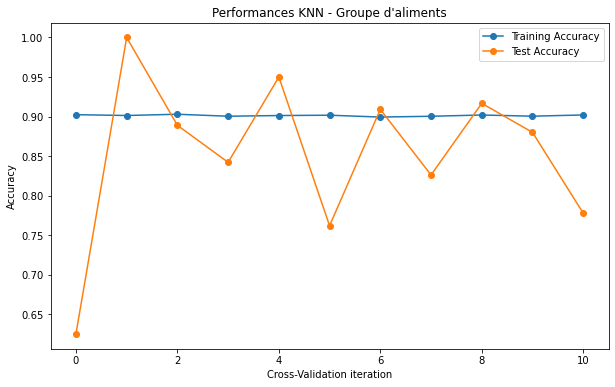

In [18]:
x_values = range(len(training_accuracy))

plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(x_values, training_accuracy, label='Training Accuracy', marker='o')

# Plot test accuracy
plt.plot(x_values, test_accuracy, label='Test Accuracy', marker='o')

plt.title('Performances KNN - Groupe d\'aliments')
plt.xlabel('Cross-Validation iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Remarque:**<br>
On voit bien cette instabilité et variance dans ce graphe au niveau des précsions des tests.

#### Essayons de trouver le k optimale pour notre dataset

In [19]:
def found_k(desc_set, label_set, dimension, num_classes, retour=True, graphe=True):
    """
    Fonction qui permet de déterminer le nombre optimal de voisins K pour un classificateur KNN multiclasse.
    :param desc_set: un numpy array représentant les données d'entrée
    :param label_set: un numpy array représentant les étiquettes de classe correspondantes pour chaque donnée
    :param dimension: la dimension de l'espace d'entrée
    :param num_classes: le nombre de classes distinctes
    """
    max_k = int(np.sqrt(len(desc_set)))
    KNN_test_acc=[]
    List_k=[]
    for k in range(1, max_k, 2):
        # appel à la fonction crossval_strat() pour obtenir les données de train et de test
        desc_train, label_train, desc_test, label_test = ut.crossval_strat(desc_set, label_set, 10, 2)
        
        # initialisation d'un classificateur KNN multiclasse
        classifeurKNN_MC = cl.ClassifierKNN_MC(dimension, k, num_classes)
        List_k.append(k)
        
        # entrainement du modèle sur les données de train
        classifeurKNN_MC.train(desc_train, label_train)
        accKNN = classifeurKNN_MC.accuracy(desc_test, label_test)
        KNN_test_acc.append(accKNN)
    
    # l'indice du maximum de la liste d'accuracy
    index = np.argmax(KNN_test_acc)
    
    if graphe:
        plt.plot(List_k, KNN_test_acc)
        plt.title("Le variation de taux accuracy en fonction de k")
        plt.ylabel("Le taux de Accuracy")
        plt.xlabel("Le valeur de K")
        plt.show()

    if retour:
        return 2*index + 1

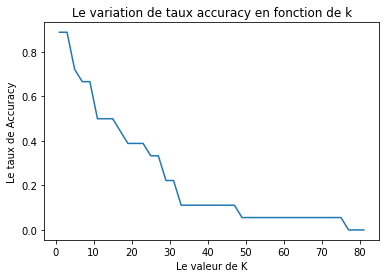

1

In [20]:
k_optimal=found_k(permuted_features,permuted_labels,15,11)
k_optimal

## KNN Classifieur avec le k_optimal

In [21]:
knn_classifier = cl.ClassifierKNN_MC(15, k_optimal, 11)
X_train, y_train, X_test, y_test = ut.crossval_strat(permuted_features, permuted_labels, 11, 2)
knn_classifier.train(X_train,y_train)
knn_classifier.accuracy(X_test,y_test)

0.9375

## Arbre des décisions

In [56]:

# Initialisation du classificateur arbre numerique avec epsilon = 0.05, la dimension de l'espace des attributs = 15 et la taille du voisinage pour le calcul des poids = 11
arbre_classifier = cl.ClassifierArbreNumerique(15, 0.05,data_ingredients_num.columns)
X_train, y_train, X_test, y_test = ut.crossval_strat(permuted_features, permuted_labels, 10, 2)
arbre_classifier.train(X_train,y_train)
arbre_classifier.accuracy(X_test,y_test)


0.9444444444444444

In [55]:
import graphviz as gv
graphe_arbre = gv.Digraph(format='png')
arbre_classifier.affiche(graphe_arbre)

NameError: name 'arbre_classifier' is not defined

In [54]:
graphe_arbre

NameError: name 'graphe_arbre' is not defined

# Aprentissage Non Supervisé

Dans cette partie on va travailler sur le Base des donnnées de Data Etape. Bien sur qu'on va utiliser les colonnes avec les nombres entiers. D'après nos informations,on préfère d'utiliser k_moyenne pour l'apprentissage supervisé.

In [9]:
data_etape_num=data_etapes.copy()
columns_to_delete = ['Code AGB', 'Code CIQUAL', 'Groupe d aliment', 'Sous-groupe d aliment','Nom du Produit en Français', 'LCI Name', 'Nom et code','DQR']
for column in columns_to_delete:
    del data_etape_num[column]
data_etape_num

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Agriculture.1,Transformation.1,Emballage.1,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
0,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
1,0.032661,0.000000,0.050709,0.015277,0.004503,0.000000,0.103150,0.066043,0.000000,0.478390,...,0.003464,0.000671,0.000440,0.000000,0.006605,4.11,4.27,4.39,2.79,5.00
2,0.040826,0.000000,0.000000,0.014071,0.005629,0.003288,0.063814,0.082554,0.000000,0.000000,...,0.000000,0.000614,0.000550,0.000016,0.003717,3.54,2.74,4.28,2.80,4.34
3,0.082933,0.000000,0.027221,0.013011,0.005629,0.003288,0.132081,0.222514,0.000000,0.329456,...,0.001150,0.000583,0.000550,0.000016,0.004779,3.75,2.74,3.62,4.33,4.33
4,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2.085451,0.045533,0.017899,0.016104,0.009053,0.002455,2.176494,21.683172,0.241985,0.275642,...,0.000034,0.000926,0.000914,0.000263,0.038303,2.47,3.77,2.02,2.01,2.08
2513,2.147376,0.010702,0.028263,0.024679,0.014295,0.033860,2.259175,22.327031,0.074157,0.435259,...,0.000053,0.001432,0.001443,0.002279,0.041251,2.45,3.66,1.28,2.04,2.82
2514,0.719615,0.000000,0.017899,0.067222,0.009053,0.002455,0.816244,3.143568,0.000000,0.275642,...,0.000034,0.003652,0.000914,0.000263,0.163057,3.68,4.60,2.54,2.59,5.00
2515,0.878692,0.000000,0.018973,0.082082,0.011054,0.034592,1.025393,3.838479,0.000000,0.225346,...,0.000939,0.004459,0.001116,0.003711,0.203390,3.56,4.30,2.62,2.34,5.00


In [10]:
data_etape_num_normal=clust.normalisation(data_etape_num)
#data_etape_num_normal=np.asarray(data_etape_num_normal)

## Le courbe de k

In [11]:
list_k=[i+2 for i in range(11)]
list_Centres_et_U=[]
for k in list_k:
    #print(k)
    Centres,U=clust.kmoyennes(k,data_etape_num_normal,0.05,100,False)
    list_Centres_et_U.append((Centres,U))

#list_Centres_et_U

In [12]:
list_Index_Dunn=[]
for k in list_k:
    #print(k)
    index_Dunn_k=clust.index_Dunn(data_etape_num_normal,list_Centres_et_U[k-2][0],list_Centres_et_U[k-2][1])
    list_Index_Dunn.append(index_Dunn_k)

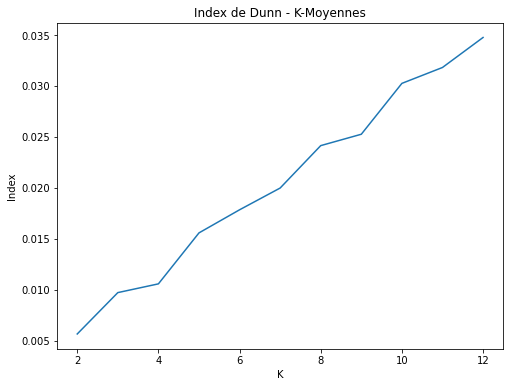

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Index de Dunn - K-Moyennes')
plt.plot(list_k,list_Index_Dunn)
plt.xlabel('K')
plt.ylabel('Index')
plt.show()

On a varié le k pour comparer les indexes de Dunn. On a constaté que k=1 est le k optimal. Par contre dans le sujet, on voit qu'il y a 11 types des données. Donc on utilisera k=11.

## Calcul de k moyennes

In [14]:
Centres,U=clust.kmoyennes(11,data_etape_num_normal,0.05,100,True)

Iteration :  1  Inertie :  1400.2617254263084  Difference :  1399.2117254263085
Iteration :  2  Inertie :  1277.115875805508  Difference :  123.14584962080039
Iteration :  3  Inertie :  1174.9346761702745  Difference :  102.1811996352335
Iteration :  4  Inertie :  1095.448689264973  Difference :  79.48598690530162
Iteration :  5  Inertie :  1073.250231552624  Difference :  22.198457712348954
Iteration :  6  Inertie :  1062.2890223067795  Difference :  10.96120924584443
Iteration :  7  Inertie :  1056.73421235013  Difference :  5.554809956649478
Iteration :  8  Inertie :  1054.4044129194929  Difference :  2.3297994306371947
Iteration :  9  Inertie :  1054.1178995993857  Difference :  0.28651332010713304
Iteration :  10  Inertie :  1054.0089177978236  Difference :  0.10898180156209492
Iteration :  11  Inertie :  1053.9664729990075  Difference :  0.042444798816177354


Le calcul de l'inertie gloale est autour de 1035 avec 20 différentes calculs.

## Visualiation des centres

In [15]:
print(len(Centres))

11


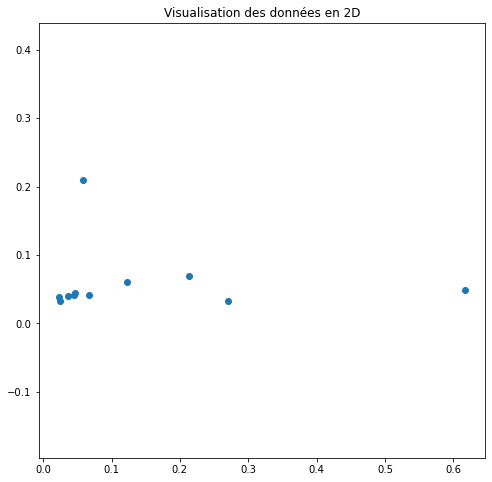

In [16]:
plt.figure(figsize=(8, 8))
plt.title('Visualisation des données en 2D')
plt.scatter(Centres[:, 0], Centres[:, 1], cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

## Le partage

In [17]:
nb=0
for group in U:
    nb=nb+len(U[group])
    print("Le groupe ",group," contient ",len(U[group]),"elements")
    
print("nb :",nb)

Le groupe  0  contient  74 elements
Le groupe  1  contient  549 elements
Le groupe  2  contient  229 elements
Le groupe  3  contient  93 elements
Le groupe  4  contient  371 elements
Le groupe  5  contient  152 elements
Le groupe  6  contient  211 elements
Le groupe  7  contient  423 elements
Le groupe  8  contient  124 elements
Le groupe  9  contient  190 elements
Le groupe  10  contient  101 elements
nb : 2517


On a discriminé nos données à 11 groupes. On constate que notre BD est divisible à 11 classes.